<a href="https://colab.research.google.com/github/MaheshGouru/CS5265-Assignment-1/blob/main/CS5265_Assignment_1_Gouru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
With the rise of GPUs accelerating workloads for notably Apple's Neural Engine, Electric Vehicles autonomous functionalities, and data-mining for medicine, generating a benchmark for which configurations would be sufficiently suited for a developer would enable affordability, accessibility, and scalability amongst heterogenous architectures. Hosted on the UCI Machine Learning Repository as released from Enrique G. Paredes and Rafael Ballester-Ripoll of University of Zurich, the SGEMM GPU kernel performance Data Set publishes "running times for multiplying two 2048 x 2048 matrices using a GPU OpenCL SGEMM kernel with varying parameters (using the library 'CLTune')". SGEMM is short for "Single precision GEneral Matrix Multiply" which addresses matrix-matrix products of float 32 bits.

The dataset has 14 parameters with 10 are ordinal and 4 are categorical (binary).

The experiment used a workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. This configuration can be replicated and reproduced for the sake of the exercise. The'gemm_fast' kernel from the automatic OpenCL kernel tuning library "CLTune" was used to interface the scripts with the GPU drivers.

# Project Description
Extracted from the dataset, the attribute information is as provided:

## Independent variables:
1-2. MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)

3.&nbsp; KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)

4-5. MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)

6-7. MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)

8.&nbsp; KWI: kernel loop unrolling factor: {2, 8} (integer)

9-10. VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)

11-12. STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)

13-14. SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

The purpose would be interact with a wizard to recommend the most cost-effective configuration, such as those used on various cloud platforms like AWS, GCP, and Azure.

# Performance Metric(s)
The output are logged in columns 15-18. These columns log the performance times in milliseconds for 4 independent runs using the same parameters. As noted, the range is between 13.25 and 3397.08.

As cited, a proportion of this data set was used to compute a tensor train based predictive model and estimate the Sobol sensitivity indices of all the parameters which could then be replicated as well to go through the exercise of benchmarking architectures for industry applications such as provided by TrTransaction Processing Performance Council (TPC) for decision support.

#References
https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance
https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html

---

## Clarification on Datasets needed for the Project Assignments
Just to recap some important highlights of the datasets needed for the upcoming project assignments:

- Size: at least 5000 datapoints (samples/rows/records), less than 100,000 datapoints are recommended

- #&nbsp;of columns: at least 7 attributes/features/variables (columns) are needed 

- Types of columns: a good dataset will contain not only numerical columns but also categorical columns (e.g., gender, dates, or anything else that has a finite number of categories) 

Some resources for acquiring data: 

- https://www.kaggle.com/datasets

- https://datasetsearch.research.google.com/ 

- https://archive.ics.uci.edu/ml/datasets.php 
---

**III. Tasks**
> [Task 2] Basic EDA: Describe 3-5 questions you would like to answer by examining the data in the issue description/detail section in a separate TEXT cell in your Jupyter Notebook
1. What is the relationship between per-matrix 2D tiling at workgroup level and 
the fastest initial test run?
2. What is the most used inner dimension of 2D tiling at workgroup level?
3. What is the fastest run after initial compiling by each of the available kernel loop unrolling factors?

In [19]:
# tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay


In [2]:
gpus = pd.read_csv('https://raw.githubusercontent.com/MaheshGouru/CS5265-Assignment-1/main/sgemm_product.csv')
# gpus = sns.load_data('gpus')

display(gpus.sample(1))
gpus.info()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
45130,32,64,32,16,32,16,16,8,1,1,1,0,1,0,63.43,64.1,62.35,65.59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


**Exploratory Data Analysis**

In [3]:
gpus['MWG'].value_counts()

128    99808
64     75584
32     47264
16     18944
Name: MWG, dtype: int64

In [4]:
gpus.isna().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

1. What is the relationship between per-matrix 2D tiling at workgroup level and the fastest initial test run?

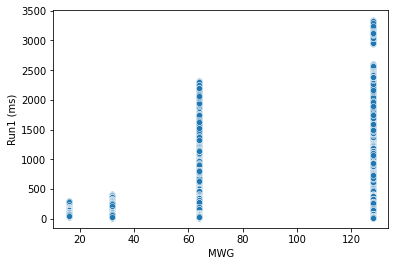

In [5]:
sns.scatterplot(x=gpus['MWG'], y=gpus['Run1 (ms)'])

The relationship between per-matrix 2D tilling at the workgroup level and fastest initial test run is those with 16 MWGs ran the fastest based on the short range.

2. What is the most used inner dimension of 2D tiling at workgroup level?

32    143648
16     97952
Name: KWG, dtype: int64

([<matplotlib.patches.Wedge at 0x7f65493f0210>,
 [Text(-0.32202233899583776, 1.0518087341278592, '32'),
  Text(0.3220224374732771, -1.0518087039779476, '16')])

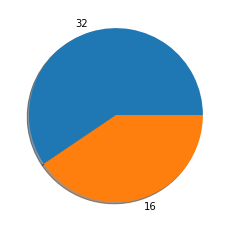

In [6]:
# Creating a pie chart to visualize porportions of the inner dimension of 2D 
# tiling at workgroup level in this data
methods_counts = gpus['KWG'].value_counts()
display(methods_counts)

plt.pie(methods_counts, labels=methods_counts.index, shadow = True)

The majority (appears to be 2/3s) is of the 32 inner dimension of 2D tiling at workgroup level

3. What is the fastest run after initial compiling by each of the available kernel loop unrolling factors?

In [7]:
gpus.groupby('KWI')['Run1 (ms)'].min()

KWI
2    13.78
8    13.29
Name: Run1 (ms), dtype: float64

The fastest run after initially compiling each of the available kernel loop 
unrolling factors had similar run times.

**Feature Engineering**
Based on my findings from Basic EDA, my plan for feature engineering would focus on extraploting correlations amongst instrinitically hierarhical data such as comparing the per-matrix 2D tiling at workgroup level. 

In [9]:
# Use groupby to get an idea of the average distance each detection method is sensitive to.
gpus.groupby('MWG')['Run1 (ms)'].mean()

MWG
16      67.559227
32      64.661752
64     151.848924
128    368.410918
Name: Run1 (ms), dtype: float64

**Train test split**
Based on teh metadata of my dataset, my train/test percent split would be 80/10/10 with training of 80% of the data, with initial testing on 10% for accuracy and then the final 10% for true sensitivity analysis.

**Establish an initial pipeline: **
The pipes I may need include creating an ad-hoc analysis for each of the features of the data set and whether there is a correlation amongst factors along with adjusting for the scaling integers.

**Model fitting and evaluation:** 1 assumption I have about feature importance or how I anticipate my model’s performance will be is there will be a hierarhical relationship

# Feature Engineering

* ➔	[35 points] Part 2: Complete the following tasks for your personal project, building on last week’s progress
    * ◆	[20 points] Feature engineering: create a heading in your notebook named Feature Engineering and curate a final list of features from your dataset

| Feature                                                                                                                                  | Type          | Description                                                         |     |     |           |   |
|------------------------------------------------------------------------------------------------------------------------------------------|---------------|---------------------------------------------------------------------|-----|-----|-----------|---|
| stereo                                                                                                                                   |               | Time as logged by configuration for performing stereo analysis      |     |     |           |   |
| convolution                                                                                                                              |               | Time as logged by configuration for performing convolution analysis |     |     |           |   |
| raycasting                                                                                                                               |               | Time as logged by configuration for performing raycasting           |     |     |           |   |
| accuracy, evaluated by comparing the predictions against replicated execution times for verified parameter configurations                |               |                                                                     |     |     |           |   |
| MWG, per-matrix 2D tiling at workgroup level:                                                                                            | (integer)     | {16                                                                 | 32  | 64  | 128}      | | |
| NWG, per-matrix 2D tiling at workgroup level:                                                                                            | (integer)     | {16                                                                 | 32  | 64  | 128}      | | |
| KWG, inner dimension of 2D tiling at workgroup level:                                                                                    | (integer)     | {16                                                                 | 32} | |   |           |   |
| MDIMC, local workgroup size:                                                                                                             | (integer)     | {8                                                                  | 16  | 32} | |         |   |
| NDIMC, local workgroup size:                                                                                                             | (integer)     | {8                                                                  | 16  | 32} | |         |   |
| MDIMA, local memory shape:                                                                                                               | (integer)     | {8                                                                  | 16  | 32} | (integer) |   |
| NDIMB, local memory shape:                                                                                                               | (integer)     | {8                                                                  | 16  | 32} | |         |   |
| KWI, kernel loop unrolling factor:                                                                                                       | (integer)     | {2                                                                  | 8}  | |   |           |   |
| VWM, per-matrix vector widths for loading and storing:                                                                                   | (integer)     | {1                                                                  | 2   | 4   | 8}        | | |
| VWN, per-matrix vector widths for loading and storing:                                                                                   | (integer)     | {1                                                                  | 2   | 4   | 8}        | | |
| STRM, enable stride for accessing off-chip memory within a single thread:                                                                | (categorical) | {0                                                                  | 1}  |     |           |   |
| STRN, enable stride for accessing off-chip memory within a single thread:                                                                | (categorical) | {0                                                                  | 1}  | |   |           |   |
| SA, per-matrix manual caching of the 2D workgroup tile:                                                                                  | (categorical) | {0                                                                  | 1}  | |   |           |   |
| SB, per-matrix manual caching of the 2D workgroup tile:                                                                                  | (categorical) | {0                                                                  | 1}  |     |           |   |
| Run1, performance times in milliseconds (ms) for first independent run using the same parameters. They range between 13.25 and 3397.08.  |               |                                                                     |     |     |           |   |
| Run2, performance times in milliseconds (ms) for second independent run using the same parameters. They range between 13.25 and 3397.08. |               |                                                                     |     |     |           |   |
| Run3, performance times in milliseconds (ms) for third independent run using the same parameters. They range between 13.25 and 3397.08.  |               |                                                                     |     |     |           |   |
| Run4, performance times in milliseconds (ms) for fourth independent run using the same parameters. They range between 13.25 and 3397.08. |               |                                                                     |     |     |           |   |


# Machine Learning (ML) Pipeline

[15 points] Establish an initial pipeline: create a new heading in your notebook named ML Pipeline, split your dataset and complete the initial pipeline with at least one model of your choice

In [15]:
gpus.isna().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [17]:
gpus = gpus.dropna()
gpus.shape

(241600, 18)

In [20]:
class_column = 'MWG'
random_seed = 2435

X_train, X_test, y_train, y_test = train_test_split(gpus.drop(columns=class_column), gpus[class_column],
                                                   test_size=0.25, random_state=random_seed, stratify=gpus[class_column])

In [21]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (181200, 17)


,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
182322,64,32,8,8,8,16,2,8,4,0,0,1,0,776.01,765.80,762.76,772.74
190506,64,32,16,8,8,16,8,2,2,1,0,1,0,214.21,216.77,216.08,216.65
5364,64,16,8,8,8,8,8,1,2,0,1,0,0,44.67,42.54,42.51,44.71
233319,128,32,16,16,16,8,8,2,1,0,1,1,1,169.22,169.30,169.21,169.26
2563,32,16,8,32,16,16,2,1,1,0,0,1,1,76.88,76.71,77.20,77.41



On X test: 
X test dimensions:  (60400, 17)


,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
79585,32,32,8,8,32,8,8,1,1,0,0,0,1,82.52,82.52,82.68,82.92
190448,64,32,16,8,8,16,8,1,2,0,0,0,0,271.95,271.25,271.37,271.53
188041,64,32,8,32,8,16,8,2,1,1,0,0,1,46.99,46.35,46.82,47.04
53802,128,16,16,16,32,16,8,1,4,1,0,1,0,36.67,36.77,36.75,36.68
106224,64,32,16,16,16,8,2,2,4,0,0,0,0,38.99,39.05,39.01,39.02


In [22]:
# X Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# X test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (181200,)


182322    128
190506    128
5364       16
233319    128
2563       16
Name: MWG, dtype: int64


On y test: 
y test dimensions:  (60400,)


79585      64
190448    128
188041    128
53802      32
106224     64
Name: MWG, dtype: int64

## Establish the training pipeline

We can now establish the training pipeline for our models. Since this is a process we would need to repeat several times, it's good to essentially functionalize the process so we do not need to re-write redundant code. Here, we can impute some values that were missing, and encode any categorical values. Note that these pipelines will change according to the model and methodology you choose - additionally, the pipelines will also change depending on the data types of the columns in your dataset. 

In [23]:
#individual pipelines for differing datatypes
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder(drop='if_binary'))])
num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
                               ('scale_num', StandardScaler())])

In [24]:
#establish preprocessing pipeline by columns
preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')

In [25]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6546beda90>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6546bed350>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

## Cross-validation with hyperparameter tuning

Now that we have our pipelines, we can now use this as part of cross validation and hyperparameter tuning.

In [26]:
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [27]:
tuning_grid

{'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06])}

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(drop='if_binary'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6546beda90>),
                                                                        ('num_pipe',
                                                    

In [29]:
print(grid_search.best_score_)
grid_search.best_params_

0.5681070640176602


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.25}

## Final fit

The final fit here is already present in the generated model due to the way we set our parameters in the grid search. If we want to look at the performance, we can do so. Here is a non-helpful description of the best model:

In [30]:
grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6547362d90>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                

In [31]:
grid_search.classes_

array([ 16,  32,  64, 128])

In [32]:
vip = grid_search.best_estimator_['mdl'].coef_[0]
vip

array([ 0.40638053,  0.04839739, -0.99192903, -0.34039975, -1.00173066,
        0.0131786 , -0.01519479, -2.62628858, -0.03284713, -0.05291106,
       -0.01298691, -0.08773804, -0.03716173, -3.39438566,  0.54548542,
       -1.13896791,  0.45614105])

In [42]:
#get names in correct preproc order
# cat_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names()
num_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
#coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})

#get sign and magnitude information
# coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             #coef_sign = np.sign(coef_info['vip']))

#sort and plot
#coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
#sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

## Performance metrics on test data


Here, we can see the performance of the model, which is pretty nice! We can also look into different scores specifically for more insight into the performance.

In [36]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          16       0.37      0.21      0.27      4736
          32       0.43      0.51      0.47     11816
          64       0.48      0.41      0.44     18896
         128       0.70      0.77      0.73     24952

    accuracy                           0.56     60400
   macro avg       0.50      0.48      0.48     60400
weighted avg       0.55      0.56      0.56     60400



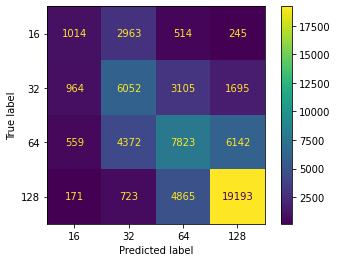

In [37]:
cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()